In [1]:
%matplotlib inline


# Stochastic examples


This example is designed to show how to use the stochatic optimization
algorithms for descrete and semicontinous measures from the POT library.




In [2]:
# Author: Kilian Fatras <kilian.fatras@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import numpy as np
import ot
import ot.plot

COMPUTE TRANSPORTATION MATRIX FOR SEMI-DUAL PROBLEM
############################################################################
############################################################################
 DISCRETE CASE:

 Sample two discrete measures for the discrete case
 ---------------------------------------------

 Define 2 discrete measures a and b, the points where are defined the source
 and the target measures and finally the cost matrix c.



In [3]:
n_source = 7
n_target = 4
reg = 1
numItermax = 1000

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "SAG" method to find the transportation matrix in the discrete case
---------------------------------------------

Define the method "SAG", call ot.solve_semi_dual_entropic and plot the
results.



In [4]:
method = "SAG"
sag_pi = ot.stochastic.solve_semi_dual_entropic(a, b, M, reg, method,
                                                numItermax)
print(sag_pi)

[[2.55553509e-02 9.96395660e-02 1.76579142e-02 4.31178196e-06]
 [1.21640234e-01 1.25357448e-02 1.30225078e-03 7.37891338e-03]
 [3.56123975e-03 7.61451746e-02 6.31505947e-02 1.33831456e-07]
 [2.61515202e-02 3.34246014e-02 8.28734709e-02 4.07550428e-04]
 [9.85500870e-03 7.52288517e-04 1.08262628e-02 1.21423583e-01]
 [2.16904253e-02 9.03825797e-04 1.87178503e-03 1.18391107e-01]
 [4.15462212e-02 2.65987989e-02 7.23177216e-02 2.39440107e-03]]


SEMICONTINOUS CASE:

Sample one general measure a, one discrete measures b for the semicontinous
case
---------------------------------------------

Define one general measure a, one discrete measures b, the points where
are defined the source and the target measures and finally the cost matrix c.



In [5]:
n_source = 7
n_target = 4
reg = 1
numItermax = 1000
log = True

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "ASGD" method to find the transportation matrix in the semicontinous
case
---------------------------------------------

Define the method "ASGD", call ot.solve_semi_dual_entropic and plot the
results.



In [6]:
method = "ASGD"
asgd_pi, log_asgd = ot.stochastic.solve_semi_dual_entropic(a, b, M, reg, method,
                                                           numItermax, log=log)
print(log_asgd['alpha'], log_asgd['beta'])
print(asgd_pi)

[3.7937628  7.65961287 3.80848103 2.58141742 1.61215093 3.44897695
 2.71747327] [-2.52391608 -2.29387992 -0.82558991  5.64338591]
[[2.21553327e-02 1.03145567e-01 1.75528576e-02 3.38501746e-06]
 [1.20021720e-01 1.47691349e-02 1.47329335e-03 6.59299438e-03]
 [3.04838905e-03 7.78276435e-02 6.19810066e-02 1.03737333e-07]
 [2.31393025e-02 3.53135903e-02 8.40777056e-02 3.26544498e-04]
 [1.05758118e-02 9.63969840e-04 1.33213201e-02 1.17996041e-01]
 [2.34525044e-02 1.16688539e-03 2.32054035e-03 1.15917213e-01]
 [3.74708983e-02 2.86448739e-02 7.47858286e-02 1.95554208e-03]]


Compare the results with the Sinkhorn algorithm
---------------------------------------------

Call the Sinkhorn algorithm from POT



In [7]:
sinkhorn_pi = ot.sinkhorn(a, b, M, reg)
print(sinkhorn_pi)

[[2.55553508e-02 9.96395661e-02 1.76579142e-02 4.31178193e-06]
 [1.21640234e-01 1.25357448e-02 1.30225079e-03 7.37891333e-03]
 [3.56123974e-03 7.61451746e-02 6.31505947e-02 1.33831455e-07]
 [2.61515201e-02 3.34246014e-02 8.28734709e-02 4.07550425e-04]
 [9.85500876e-03 7.52288523e-04 1.08262629e-02 1.21423583e-01]
 [2.16904255e-02 9.03825804e-04 1.87178504e-03 1.18391107e-01]
 [4.15462212e-02 2.65987989e-02 7.23177217e-02 2.39440105e-03]]


PLOT TRANSPORTATION MATRIX
#############################################################################



Plot SAG results
----------------



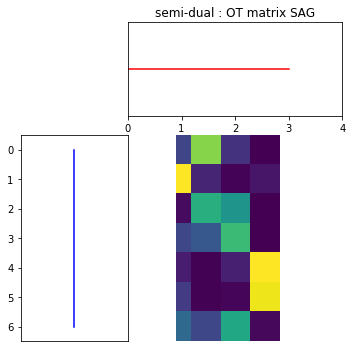

In [8]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sag_pi, 'semi-dual : OT matrix SAG')
pl.show()

Plot ASGD results
-----------------



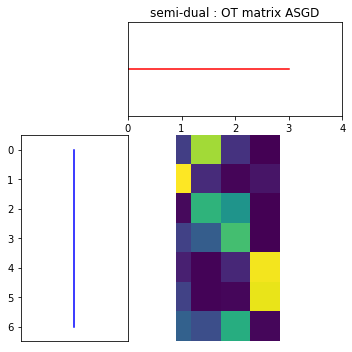

In [9]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, asgd_pi, 'semi-dual : OT matrix ASGD')
pl.show()

Plot Sinkhorn results
---------------------



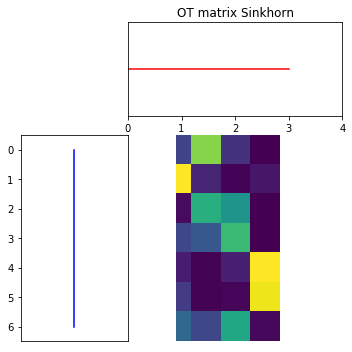

In [10]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sinkhorn_pi, 'OT matrix Sinkhorn')
pl.show()

COMPUTE TRANSPORTATION MATRIX FOR DUAL PROBLEM
############################################################################
############################################################################
 SEMICONTINOUS CASE:

 Sample one general measure a, one discrete measures b for the semicontinous
 case
 ---------------------------------------------

 Define one general measure a, one discrete measures b, the points where
 are defined the source and the target measures and finally the cost matrix c.



In [11]:
n_source = 7
n_target = 4
reg = 1
numItermax = 100000
lr = 0.1
batch_size = 3
log = True

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "SGD" dual method to find the transportation matrix in the
semicontinous case
---------------------------------------------

Call ot.solve_dual_entropic and plot the results.



In [12]:
sgd_dual_pi, log_sgd = ot.stochastic.solve_dual_entropic(a, b, M, reg,
                                                         batch_size, numItermax,
                                                         lr, log=log)
print(log_sgd['alpha'], log_sgd['beta'])
print(sgd_dual_pi)

[0.91323163 2.78641673 1.06629943 0.01804936 0.61062914 1.81958274
 0.11217916] [0.34004858 0.48129361 1.57541501 4.92963099]
[[2.17913197e-02 9.28312769e-02 1.08665637e-02 9.30212767e-08]
 [1.60939150e-02 1.81215529e-03 1.24345544e-04 2.47002125e-05]
 [3.44318299e-03 8.04381532e-02 4.40643612e-02 3.27371535e-09]
 [3.12534315e-02 4.36443287e-02 7.14771848e-02 1.23227019e-05]
 [6.81023930e-02 5.68002968e-03 5.39927027e-02 2.12291313e-02]
 [8.06039569e-02 3.66972769e-03 5.01990391e-03 1.11309234e-02]
 [4.85325711e-02 3.39488142e-02 6.09673962e-02 7.07656480e-05]]


Compare the results with the Sinkhorn algorithm
---------------------------------------------

Call the Sinkhorn algorithm from POT



In [13]:
sinkhorn_pi = ot.sinkhorn(a, b, M, reg)
print(sinkhorn_pi)

[[2.55553508e-02 9.96395661e-02 1.76579142e-02 4.31178193e-06]
 [1.21640234e-01 1.25357448e-02 1.30225079e-03 7.37891333e-03]
 [3.56123974e-03 7.61451746e-02 6.31505947e-02 1.33831455e-07]
 [2.61515201e-02 3.34246014e-02 8.28734709e-02 4.07550425e-04]
 [9.85500876e-03 7.52288523e-04 1.08262629e-02 1.21423583e-01]
 [2.16904255e-02 9.03825804e-04 1.87178504e-03 1.18391107e-01]
 [4.15462212e-02 2.65987989e-02 7.23177217e-02 2.39440105e-03]]


Plot  SGD results
-----------------



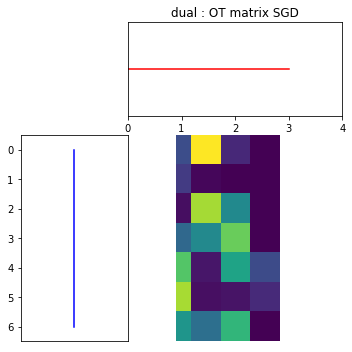

In [14]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sgd_dual_pi, 'dual : OT matrix SGD')
pl.show()

Plot Sinkhorn results
---------------------



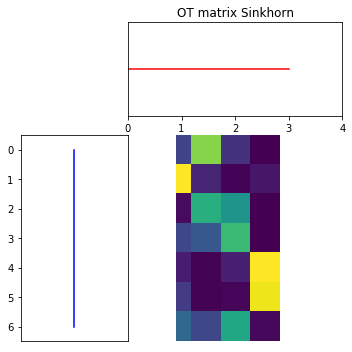

In [15]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sinkhorn_pi, 'OT matrix Sinkhorn')
pl.show()